In [217]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import matplotlib.pyplot as plt
from sklearn import svm

In [218]:
data_df = pd.read_csv("/Users/ahmadzarzar/Maskin_lärning_kurs/Deep lärning Linjär_reg/CSV/random_data.csv")
data_df_2 = pd.read_csv("/Users/ahmadzarzar/Maskin_lärning_kurs/Deep lärning Linjär_reg/CSV/random_data_2.csv")
data_df_3 = pd.read_csv("/Users/ahmadzarzar/Maskin_lärning_kurs/Deep lärning Linjär_reg/CSV/random_data_3.csv")
data_df_3_d = pd.read_csv("/Users/ahmadzarzar/Maskin_lärning_kurs/Deep lärning Linjär_reg/CSV/random_data_3d.csv")

In [219]:
data_df.head()

,feature_1,feature_2,target
0,0.811586,1.977330,1
1,-0.283428,-1.368891,0
2,-0.281272,0.858368,1
3,0.617176,1.293528,1
4,1.080526,0.815136,1


In [220]:
data_df_2.head()

,feature_1,feature_2,target
0,0.811586,1.977330,1
1,-0.283428,-1.368891,0
2,-0.281272,0.858368,1
3,0.617176,1.293528,1
4,1.080526,0.815136,1


In [221]:
data_df_3.head()

,Unnamed: 0,feature_1,feature_2,target
0,0,0.811586,1.977330,1
1,1,-0.283428,NaN,0
2,2,-0.281272,0.858368,1
3,3,0.617176,1.293528,1
4,4,1.080526,0.815136,1


### Saknas värden?

Det sakans inte värden på första två dataset men random_data_3 skanas värden i den datasetet.

In [222]:
print(f'***Randomdata***\n{data_df.isna().sum()}')
print(f'***Randomdata_2***\n{data_df_2.isna().sum()}')
print(f'***Randomdata_3***\n{data_df_3.isna().sum()}')

***Randomdata***
feature_1    0
feature_2    0
target       0
dtype: int64
***Randomdata_2***
feature_1    0
feature_2    0
target       0
dtype: int64
***Randomdata_3***
Unnamed: 0     0
feature_1     50
feature_2     49
target         0
dtype: int64


### Finns dubbletter?

Ja det finns dubbletter i random_data_2 dataset genom funtion som heter duplicated som visar oss genom att skriva ut antigen False eller TRUE så och true betyder att det finns dubbletter, för i de andra dataset visades bara false.

In [223]:
print(f'***Randomdata***\n{data_df.duplicated().value_counts()}')
print(f'***Randomdata_2***\n{data_df_2.duplicated().value_counts()}')
print(f'***Randomdata_3***\n{data_df_3.duplicated().value_counts()}')





***Randomdata***
False    1000
dtype: int64
***Randomdata_2***
False    500
True     500
dtype: int64
***Randomdata_3***
False    1000
dtype: int64


### Finns extremvärden?

Nej det finns inte som ni ser på visualiseringen nedan för varje dataset att det inte finns värde som sticker ut från de övriga de ser ganska ihopslagna ut. annar bör finnas några som sticker ut för att det ska finnas extremtvärde.

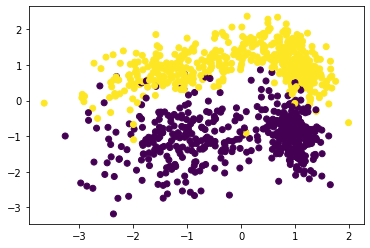

In [224]:

plt.scatter(data_df['feature_1'],data_df['feature_2'],c=y)
plt.show()


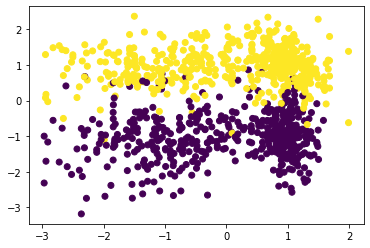

In [225]:

plt.scatter(data_df_2['feature_1'],data_df['feature_2'],c=y)
plt.show()


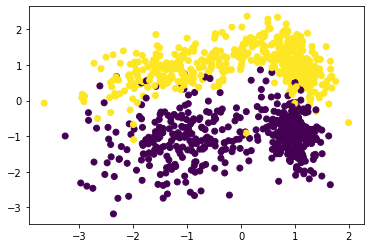

In [226]:
plt.scatter(data_df_3['feature_1'],data_df['feature_2'],c=y)
plt.show()


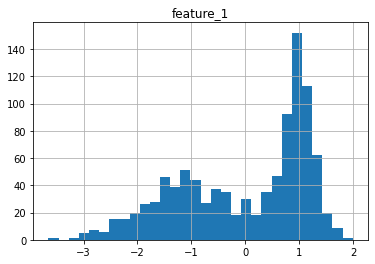

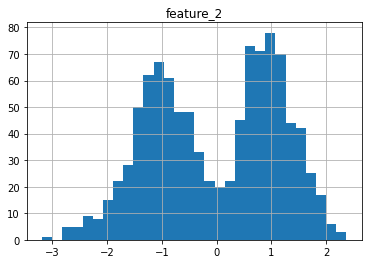

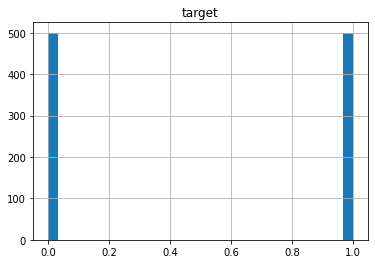

In [227]:
fethchar_list=[['feature_1'],['feature_2'],['target']]


for x in fethchar_list:
    data_df[x].hist(bins=30)

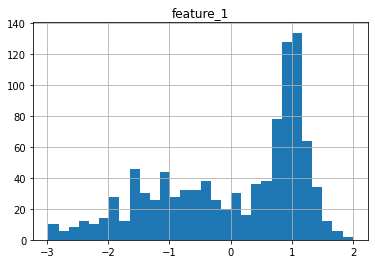

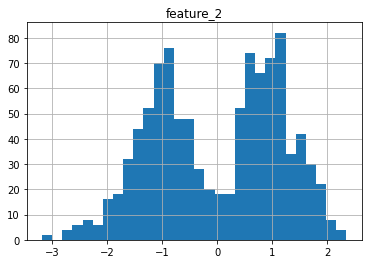

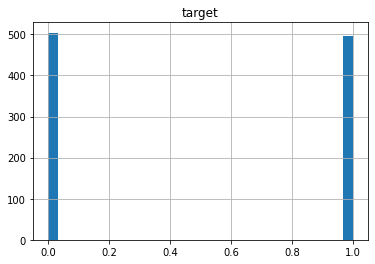

In [228]:
fethchar_list=[['feature_1'],['feature_2'],['target']]


for x in fethchar_list:
    data_df_2[x].hist(bins=30)

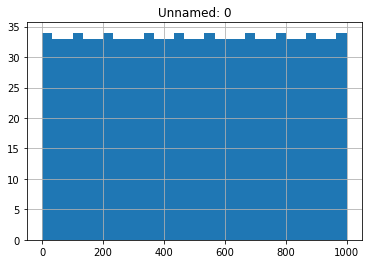

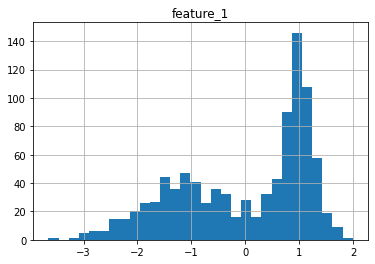

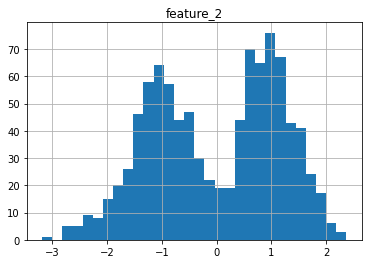

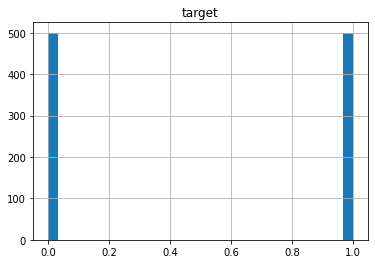

In [229]:
fethchar_list=[['Unnamed: 0'],['feature_1'],['feature_2'],['target']]


for x in fethchar_list:
    data_df_3[x].hist(bins=30)

### Annat?

Jag tycker att man bör ta bort kolumen Unnamed från ranndomddata_3 för den är onöding och den kolumnen som är onödig kan göra data sämre.

### Välja Dataset

Efter jag har Analyserat de tre olika dataseten så nu är det dags att välja datan som jag anser att den har har bäst kvalitet.
och den är .........

In [230]:
x=data_df.drop(columns=['target'])
y=data_df.target

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.2,random_state=42)

In [231]:

kernel_lista=['linear','sigmoid','poly','rbf']

for k in kernel_lista:
    print(f'Kernel typen är nu ***{k}***')

    s_v_m= svm.SVC(kernel=k)

    s_v_m.fit(x_train,y_train)
    test= s_v_m.score(x_test,y_test)

    print(f'Testsocre är {test}')





Kernel typen är nu ***linear***
Testsocre är 0.985
Kernel typen är nu ***sigmoid***
Testsocre är 0.95
Kernel typen är nu ***poly***
Testsocre är 0.98
Kernel typen är nu ***rbf***
Testsocre är 0.995


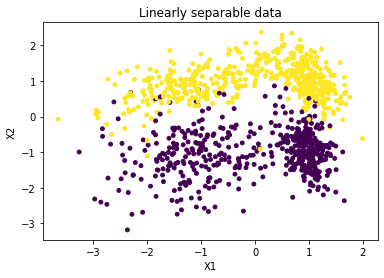

In [232]:
plt.scatter(x['feature_1'],x['feature_2'],c=y, s = 15)
# plt.scatter(s_v_m.support_vectors_,s_v_m.support_vectors_, color='red')
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


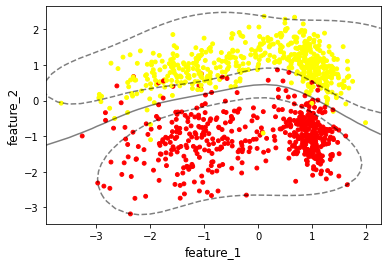

In [233]:
ax = plt.gca()
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, s=15, cmap='autumn')
plt.xlabel(x.iloc[:,0].name, fontsize=12)
plt.ylabel(x.iloc[:,1].name, fontsize=12)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = s_v_m.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='black', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# ax.scatter(s_v_m.support_vectors_[:, 0], s_v_m.support_vectors_[:, 1], s=100,
#            linewidth=1, facecolors='green', edgecolors='blue')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


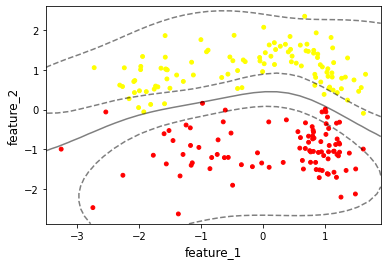

In [234]:
ax = plt.gca()
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=y_test, s=15, cmap='autumn')
plt.xlabel(x.iloc[:,0].name, fontsize=12)
plt.ylabel(x.iloc[:,1].name, fontsize=12)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = s_v_m.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='black', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# ax.scatter(s_v_m.support_vectors_[:, 0], s_v_m.support_vectors_[:, 1], s=100,
#            linewidth=1, facecolors='green', edgecolors='blue')
plt.show()